<b><font size="3">Importing Libraries</font></b>

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.constraints import maxnorm

In [ ]:
missing_rows = df[df.isnull().any(axis=1)]
missing_rows

<b><font size="3">Importing & Inserting Column Names for Dataset</font></b>

In [2]:
col_names = ['Buying', 'Maint', 'Doors', 'Persons', 'Lug.Boot', 'Safety', 'Class']

In [3]:
car_data = pd.read_csv('C:\\Users\\jorom\\Documents\\University\\Trimester 1\\Assignment\\Machine Learning & Data Mining\\Items\\car.data', names = col_names)

<b><font size="3">Reading the Dataset</font></b>

In [4]:
print("The data set has {} rows and {} columns.".format(car_data.shape[0],car_data.shape[1]))

The data set has 1728 rows and 7 columns.


In [5]:
car_data.head()

,Buying,Maint,Doors,Persons,Lug.Boot,Safety,Class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [6]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Buying    1728 non-null   object
 1   Maint     1728 non-null   object
 2   Doors     1728 non-null   object
 3   Persons   1728 non-null   object
 4   Lug.Boot  1728 non-null   object
 5   Safety    1728 non-null   object
 6   Class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [7]:
car_data.describe()

,Buying,Maint,Doors,Persons,Lug.Boot,Safety,Class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [8]:
car_data.isnull().any()

Buying      False
Maint       False
Doors       False
Persons     False
Lug.Boot    False
Safety      False
Class       False
dtype: bool

In [9]:
for col in car_data.columns:
    print("Column:", col)
    print(car_data[col].value_counts(),'\n')

Column: Buying
vhigh    432
high     432
med      432
low      432
Name: Buying, dtype: int64 

Column: Maint
vhigh    432
high     432
med      432
low      432
Name: Maint, dtype: int64 

Column: Doors
2        432
3        432
4        432
5more    432
Name: Doors, dtype: int64 

Column: Persons
2       576
4       576
more    576
Name: Persons, dtype: int64 

Column: Lug.Boot
small    576
med      576
big      576
Name: Lug.Boot, dtype: int64 

Column: Safety
low     576
med     576
high    576
Name: Safety, dtype: int64 

Column: Class
unacc    1210
acc       384
good       69
vgood      65
Name: Class, dtype: int64 



<AxesSubplot:xlabel='Class', ylabel='count'>

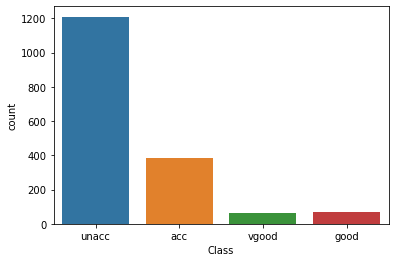

In [10]:
sns.countplot(car_data['Class'])

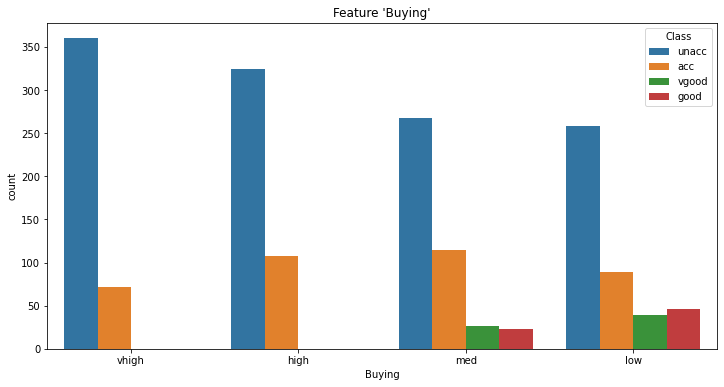

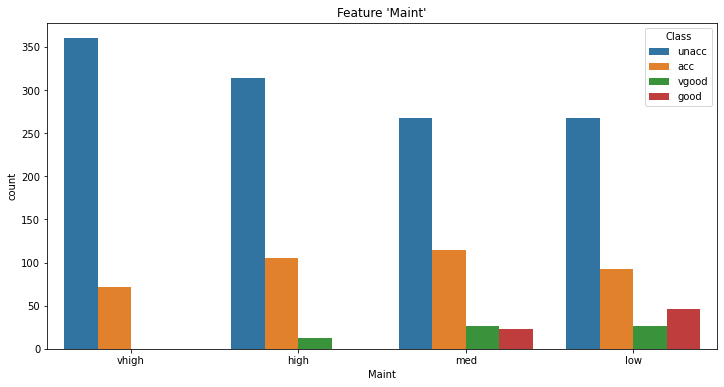

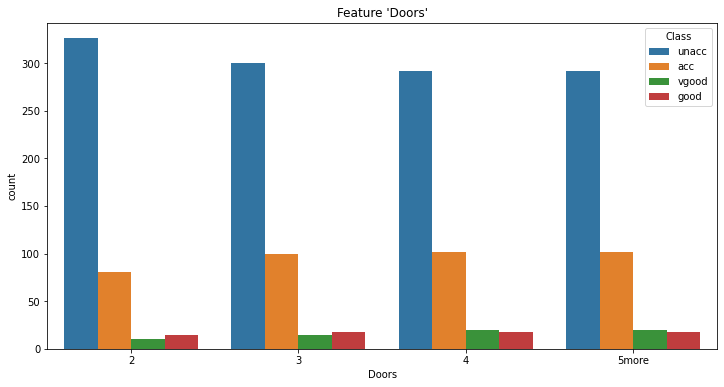

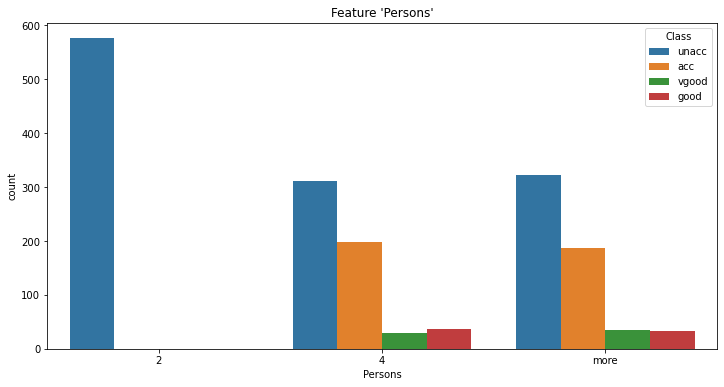

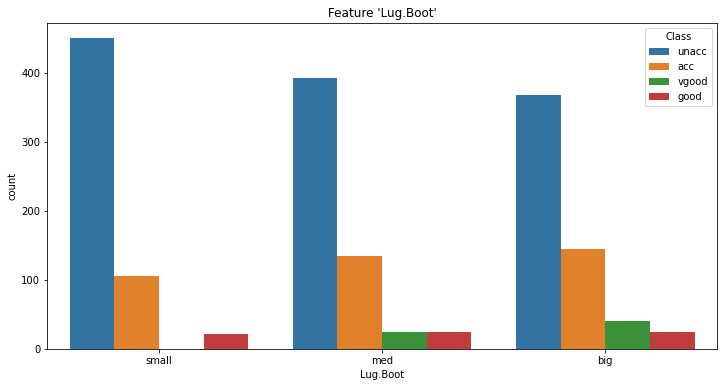

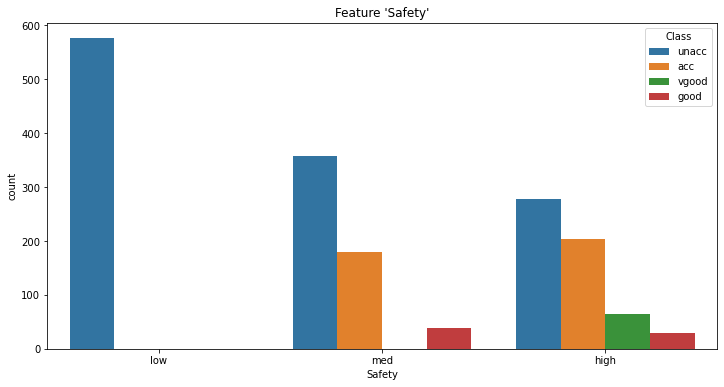

In [11]:
for i in car_data.columns[:-1]:
    plt.figure(figsize=(12,6))
    plt.title("Feature '%s'"%i)
    sns.countplot(car_data[i],hue=car_data['Class'])

<b><font size="3">Using LabelEncoder to Convert Values to Numeric</font></b>

In [12]:
le=LabelEncoder()

In [13]:
for i in car_data.columns:
    car_data[i]=le.fit_transform(car_data[i])

In [14]:
car_data.head()

,Buying,Maint,Doors,Persons,Lug.Boot,Safety,Class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


In [15]:
car_data.describe()

,Buying,Maint,Doors,Persons,Lug.Boot,Safety,Class
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,1.553241
std,1.118358,1.118358,1.118358,0.816733,0.816733,0.816733,0.875948
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.750000,0.750000,0.750000,0.000000,0.000000,0.000000,1.000000
50%,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,2.000000
75%,2.250000,2.250000,2.250000,2.000000,2.000000,2.000000,2.000000
max,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,3.000000


In [16]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Buying    1728 non-null   int32
 1   Maint     1728 non-null   int32
 2   Doors     1728 non-null   int32
 3   Persons   1728 non-null   int32
 4   Lug.Boot  1728 non-null   int32
 5   Safety    1728 non-null   int32
 6   Class     1728 non-null   int32
dtypes: int32(7)
memory usage: 47.4 KB


<b><font size="3">Splitting the Data for Accuracy Tests</font></b>

In [17]:
X = car_data[car_data.columns[:-1]]
Y = car_data['Class']

In [18]:
X.head()

,Buying,Maint,Doors,Persons,Lug.Boot,Safety
0,3,3,0,0,2,1
1,3,3,0,0,2,2
2,3,3,0,0,2,0
3,3,3,0,0,1,1
4,3,3,0,0,1,2


In [19]:
Y.head()

0    2
1    2
2    2
3    2
4    2
Name: Class, dtype: int32

In [20]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.3, random_state = 1)

<b><font size="3">Creating Model for ANN Classifier</font></b>

In [21]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(100, activation='relu', input_shape=(6,))) 
model.add(tf.keras.layers.Dense(10, activation='relu', input_shape=(6,))) 
model.add(tf.keras.layers.Dense(5, activation='softmax'))

In [22]:
model.compile(optimizer='adam', 
           loss='sparse_categorical_crossentropy',
           metrics='accuracy')

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               700       
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
Total params: 1,765
Trainable params: 1,765
Non-trainable params: 0
_________________________________________________________________


In [24]:
history = model.fit(X_Train, Y_Train, 
                    batch_size = 5, 
                    epochs= 50, 
                    verbose = 2, 
                    validation_split = 0.2)

Epoch 1/50
194/194 - 1s - loss: 0.9314 - accuracy: 0.6887 - val_loss: 0.7384 - val_accuracy: 0.7025 - 668ms/epoch - 3ms/step
Epoch 2/50
194/194 - 0s - loss: 0.7182 - accuracy: 0.7042 - val_loss: 0.6996 - val_accuracy: 0.7066 - 229ms/epoch - 1ms/step
Epoch 3/50
194/194 - 0s - loss: 0.6665 - accuracy: 0.7032 - val_loss: 0.6574 - val_accuracy: 0.6901 - 215ms/epoch - 1ms/step
Epoch 4/50
194/194 - 0s - loss: 0.6082 - accuracy: 0.7342 - val_loss: 0.5700 - val_accuracy: 0.7521 - 209ms/epoch - 1ms/step
Epoch 5/50
194/194 - 0s - loss: 0.5317 - accuracy: 0.7766 - val_loss: 0.5270 - val_accuracy: 0.7686 - 210ms/epoch - 1ms/step
Epoch 6/50
194/194 - 0s - loss: 0.4812 - accuracy: 0.7901 - val_loss: 0.4737 - val_accuracy: 0.7769 - 199ms/epoch - 1ms/step
Epoch 7/50
194/194 - 0s - loss: 0.4313 - accuracy: 0.8139 - val_loss: 0.4310 - val_accuracy: 0.8140 - 206ms/epoch - 1ms/step
Epoch 8/50
194/194 - 0s - loss: 0.3939 - accuracy: 0.8345 - val_loss: 0.4111 - val_accuracy: 0.8017 - 214ms/epoch - 1ms/step


<b><font size="3">Evaluating Results of ANN</font></b>

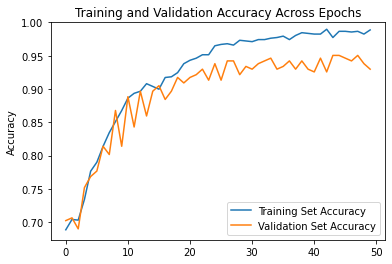

In [25]:
accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

plt.plot(accuracy, label='Training Set Accuracy') 
plt.plot(validation_accuracy, label='Validation Set Accuracy') 
plt.ylabel('Accuracy') 
plt.ylim([min(plt.ylim()),1]) 
plt.title('Training and Validation Accuracy Across Epochs') 
plt.legend()

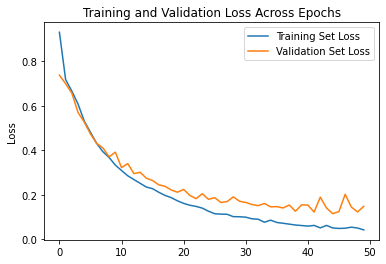

In [26]:
loss = history.history['loss'] 
validation_loss = history.history['val_loss'] 

plt.plot(loss, label='Training Set Loss') 
plt.plot(validation_loss, label='Validation Set Loss') 
plt.ylabel('Loss') 
plt.title('Training and Validation Loss Across Epochs') 
plt.legend()

In [27]:
pred_ann = model.predict(X_Test)
pred_ann = pred_ann.argmax(axis=1)

17/17 [==============================] - 0s 872us/step


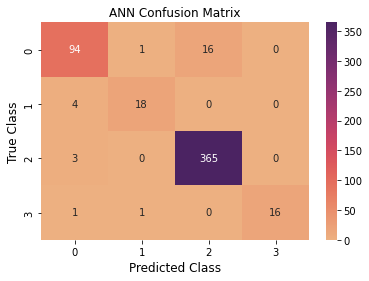

In [28]:
confusion_matrix = confusion_matrix(Y_Test, pred_ann) 
ax = sns.heatmap(confusion_matrix, cmap='flare', annot=True, fmt='d')

plt.xlabel("Predicted Class", fontsize=12) 
plt.ylabel("True Class", fontsize=12) 
plt.title("ANN Confusion Matrix", fontsize=12) 

plt.show()

In [29]:
print(classification_report(Y_Test, pred_ann))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88       111
           1       0.90      0.82      0.86        22
           2       0.96      0.99      0.97       368
           3       1.00      0.89      0.94        18

    accuracy                           0.95       519
   macro avg       0.94      0.89      0.91       519
weighted avg       0.95      0.95      0.95       519



In [30]:
scores = model.evaluate(X_Test, Y_Test)
print('Neural Network %s: %.2f%%' % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 882us/step - loss: 0.1472 - accuracy: 0.9499
Neural Network accuracy: 94.99%
